# **Reducción de dimensiones**
# PCA: Análisis de componentes principales

Un problema puede tener múltiples dimensionalidades dependiendo de las características del mismo.

Si los datos tienen muchas propiedades asociadas, yy estas son más que las observaciones independientes, podemos estar sobre ajustando nuestro modelo. Es más difícil encontrar patrones (o clusters) en datos con muchas propiedades; puesto a que cada conjunto de datos parece igualmente equidistante. Entonces, la probabilidad de encontrar una observación con una combinación particular de las propiedades tiende a cero.

En casos como estos será útil **reducir la dimensionalidad**.


# Reducción de dimensiones del espacio de variables.
Para reducir la dimensionalidad de datos, podemos aplicar varios métodos:


*   *Eliminación de variables.*  No todas las variables afectan de igual forma a la observable, así que ignoramos aquellas que nos afectan menos.
*   *Extracción de variables.* Creamos nuevas variables ordenadas respecto a que tan bien predicen la observable. Usamos solo las n-primeras nuevas variables, como por ejemplo el PCA.

El **PCA** es un análisis de componentes principales del conjunto de datos.


*   *Contras*:
    1. Las nuevas variables dejan de ser fácilmente interpretables.
*   *Pros*:  
    1.  Se reduce el número de variables sin tener que hacer juicios sobre cual es más o menos importante.
    2.  Las nuevas variables son independientes.
    3.  Podemos hacer regresiones o inferencia con las nuevas variables.

# PCA

Su objetivo es encontrar combinaciones de variables que sean independientes y que estén ordenadas por importancia o contribución a la observable.


*   Para $N$ observaciones con $K$ variables, los datos se ordenan en una matriz de $N*K$ dimensiones.
*   El objetivo es encontrar los eigenvalores y eigenvectores de esta matriz, ya que cualquier vector de la matriz original puede construirse a partir de una combinación lineal de los eigenvectores.

Los eigenvectores coinciden con las direcciones de máxima variación.



1.   **Organiza los datos en una matriz** de $N$ filas y $K$ columnas (cada columna corresponde con las variables).

Cabe mencionar que la matriz es Hermitiana.
2. **Centrar y estandarizar la matriz X**. Para *centrar*, restar el promedio en cada columna, para que una tenga promedio igual a cero. Para *estandarizar*, dividir la variable en cada columna por su desviación estandar (que cada columna tenga su desviación estandar); esto sólo se hace si la varianza de cada variable no importa, pero puede omitirse si es que es importante tener información de la varianza en cada variable.
3. **Encontrar los componentes principales de R**.
    * *Opción a*: Encontrar los eigenvalores de la matriz de covarianza
    $ C_x=\dfrac{1}{N-1}X^TX $
    * *Opción b*: Encontrar los eigenvectores de la matriz de covarianza
    $ M_x=\dfrac{1}{N-1}XX^T $
    * *Opción c*: Calcular los eigenvectores y eigenvalores de $X$
4. Ordenamos los eigenvalores de mayor a menor para construir una matriz de eigenvectores ordenada ($P*$), donde cada columna corresponde con el eigenvalor ordenado. Podemos mantener solo los primeros n-eigenvectores si ya estamos haciendo la reducción de variables.



# ¿Qué número de componentes es el óptimo a mantener?
1. Determinar el número de variables que queremos manejar y descartar el resto.
2. Determinar la proporción de varianza que se reproduce con las nuevas variables y establecer un límite.

A continuación, realizaremos un ejemplo de este análisis, replicando el código de la página https://www.astroml.org/book_figures/chapter7fig_spec_reconstruction.html y jugando con sus parámetros.

Primero, instalamos el paquete de astroML.

Esta contiene una librería de rutinas estadísticas y de machine learning para analizar datos astronómicos, cargadores de varias datasets astronómicas abiertas y muchos ejemplos para analizar o visualizar datasets astronómicos.

Si se requieren más detalles de este aquete, se puede consultar una guía de uso en https://www.astroml.org/user_guide/index.html, https://ieeexplore.ieee.org/document/6382200?tp=&arnumber=6382200  o en https://www.astroml.org/astroML-notebooks/, cuyo repositorio es https://github.com/astroML/astroML-notebooks

In [2]:
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.5 MB/s eta 0:00:00


Buscamos reconstruir un espectro particular desde sus eigenvectores. El espectro de entrada viene dado en color gris, mientras que la reconstrucción parcial para términos más progresivos aparece en color negro.

In [7]:
# Autor: Jake VanderPlas
# Licencia: BSD
# La imagen que este código da como resultado está publicada en el libro "Statistics, Data Mining, and Machine Learning in Astronomy" (2013).
# Para más información, consultar http://astroML.github.com. Para reportar un error, usar el foro https://groups.google.com/forum/#!forum/astroml-general.
import numpy as np
from matplotlib import pyplot as plt

#Importamos el paquete que contiene la función PCA
from sklearn.decomposition import PCA

# Importamos las datasets que usaremos para el análisis
from astroML.datasets import sdss_corrected_spectra
from astroML.utils import pickle_results

In [27]:
# Esta función ajusta la configuración de matplotlib para lograr una apariencia uniforme en el liro de texto.
# usetex=True representa las fuentes con LaTex. Si éste no está instalado en el sistema, establecer usetex=False.
if "setup_text_plots" not in globals():
  from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

In [28]:
# Descargamos los datos
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()  # Obtiene los datos de la librería
spectra = sdss_corrected_spectra.reconstruct_spectra(data)  # Espectro de los datos
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)  # Longitud de onda de los datos

In [29]:
#Calculamos los componentes PCA: eigenvectores
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

In [39]:
# Debido a que los espectros se reconstruyeron a partir de valores enmascarados, esto no es exactamente correcto en este caso.
# Entonces, utilizaremos los valores calculados en el archivo compute_sdss_pca.py
evals = data['evals'] ** 2
evals_s = evals.cumsum()  # Sumatoria de los eigenvalores
evals_s /= evals_s[-1]
evecs = data['evecs']  # Eigenvectores
spec_mean = spectra.mean(0)  # Promedio de espectros

In [40]:
# Encontramos los coeficientes para un espectro particular
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)  # Producto escalar de dos arrays: eigenvectores y el espectro menos el espectro promedio.

 Los coeficientes representan cómo se puede expresar el espectro como una combinación lineal de los eigenvectores. Cada coeficiente indica la importancia de un eigenvector particular en la representación del espectro.

La línea

    coeff = np.dot(evecs, spec - spec_mean)
puede ser interpretada como la proyección de 'spec' en el espacio de los eigenvectores. La variable 'coeff' contiene los valores resultantes que indican cómo 'spec' se relaciona con los componentes principales representados por los eigenvectores.

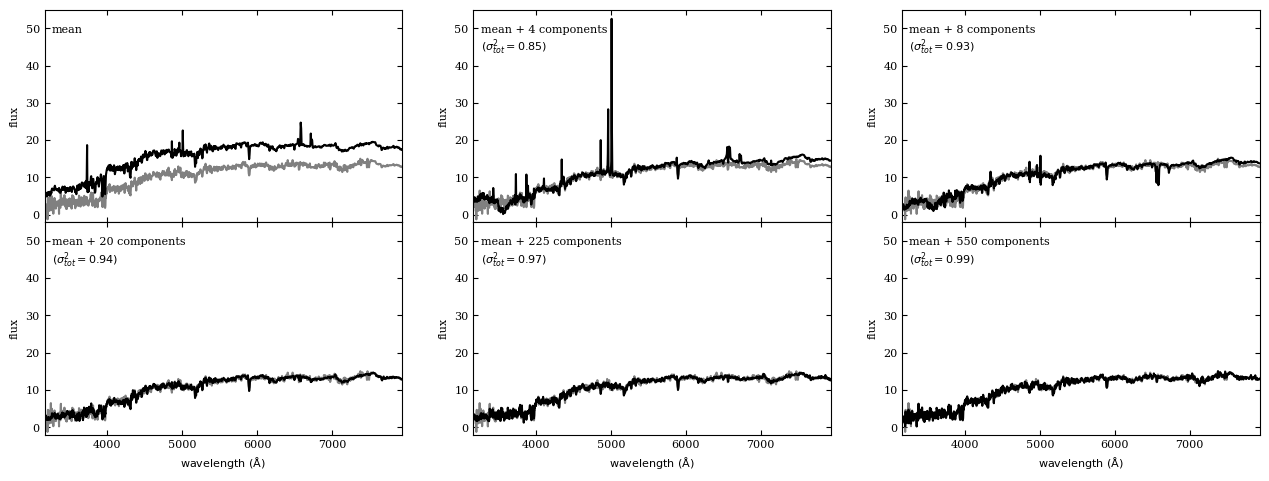

In [86]:
# Ploteamos la secuencia de reconstrucciones
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)  # No debe haber espacio vertical entre los subplots (hspace=0)

for i, n in enumerate([0, 4, 8, 20, 225, 550]):
    ax = fig.add_subplot(631 + i)
    # Si queremos agregar más páneles a la imágen, cambiar el 6 a la cantidad de páneles deseada, y agregar las nuevas cantidades de componentes en el [] del ciclo
    # Si se desean más de tres páneles por fila, cambiar el 3

    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')
    # Traza el espectro reconstruido utilizando los componentes principales calculados previamente. Se utiliza la cantidad de componentes especificada por n.

    ax.set_xlabel (r'${\rm wavelength\ (\AA)}$')

    ax.set_ylim(-2, 55)  # Aquí podemos cambiar los rangos del eje y de las gráficas
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_s[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

plt.show()

El primer panel muestra solamente el promedio del conjunto de espectros.

Cuando se agregan 550 PCA componentes, podemos observar que la reconstrucción es muy cercana a los espectros dados como entrada, como así indica la varianza total esperada del 99%

# Tarea
Ver la otra libreria para poder aplicar este método a los datos obtenidos con DESI